In [1]:
from transformers import logging
from transformers import BertModel, BertTokenizer
from transformers import pipeline
import torch
import torch.nn as nn
from torch.nn.functional import normalize, log_softmax

In [2]:
logging.set_verbosity_error()
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
from LamaTRExData import LamaTRExData
from SentenceComparison.SentenceComparison import SentenceComparison 
from ModelHelpers.fill_mask_helpers import get_probability_from_pipeline_for_token
from relation_templates.templates import get_templates, get_relation_meta, relations, relation_names
from PipelineCacheWrapper.PipelineCacheWrapper import PipelineCacheWrapper

In [4]:
USELESS_WORD = "Erftwerk"
UNKNOWN_TOKEN = "[UNK]"
MASK = "[MASK]"
OBJ_LABEL = "obj-label"
SUBJ_LABEL = "sub-label"
VOCABULARY_SIZE = 28996
words = [] 

In [5]:
#relations = ["P140", "P127", "P36", "P159"]
#relations = ["P1303"]
relations = ["P19", "P413", "P159", "P103"]
len(relations)

4

In [6]:
%%time
model = pipeline('fill-mask', model="bert-base-cased", top_k=VOCABULARY_SIZE)

CPU times: user 1.09 s, sys: 160 ms, total: 1.25 s
Wall time: 7.88 s


In [7]:
TREx = LamaTRExData(relations = relations)
TREx.load()

In [8]:
@torch.no_grad()
def metric(sentence: str, token: str):
    prob = get_probability_from_pipeline_for_token(model(sentence), token)
    return prob

In [9]:
Comparer = SentenceComparison(relations, get_templates, metric, MASK, get_relation_meta)

In [10]:
Comparer.compare(TREx.data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 977/977 [31:51<00:00,  1.96s/it]


%%time
model.save_to_cache()

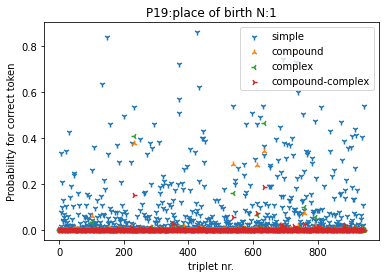

In [16]:
Comparer.plot_comparison_for_relation("P19", "Probability for correct token")

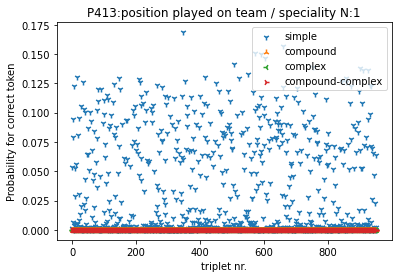

In [17]:
Comparer.plot_comparison_for_relation("P413", "Probability for correct token")

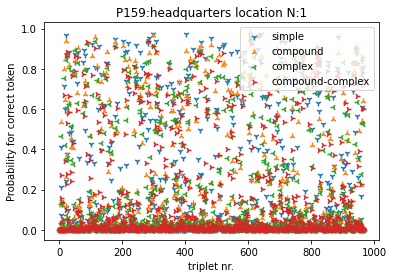

In [18]:
Comparer.plot_comparison_for_relation("P159", "Probability for correct token")

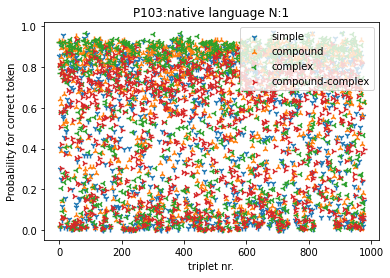

In [19]:
Comparer.plot_comparison_for_relation("P103", "Probability for correct token")